<a href="https://colab.research.google.com/github/danon6868/blastim-ml/blob/main/statistics_day_9/%D0%9D%D0%B5%D0%B4%D0%B5%D0%BB%D1%8F_3_%D0%94%D0%B5%D0%BD%D1%8C_9_%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_1_%D0%9A%D0%BB%D0%B0%D1%81%D1%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Z-test

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams["figure.figsize"] = 10, 7
plt.rcParams["font.size"] = 14

## Create population

In [42]:
population = np.random.normal(180, 20, size=1000000)

mu = population.mean()
sigma = population.std()

print(f"mu: {mu:.3f}\tsigma: {sigma:.3f}")

mu: 179.956	sigma: 20.012


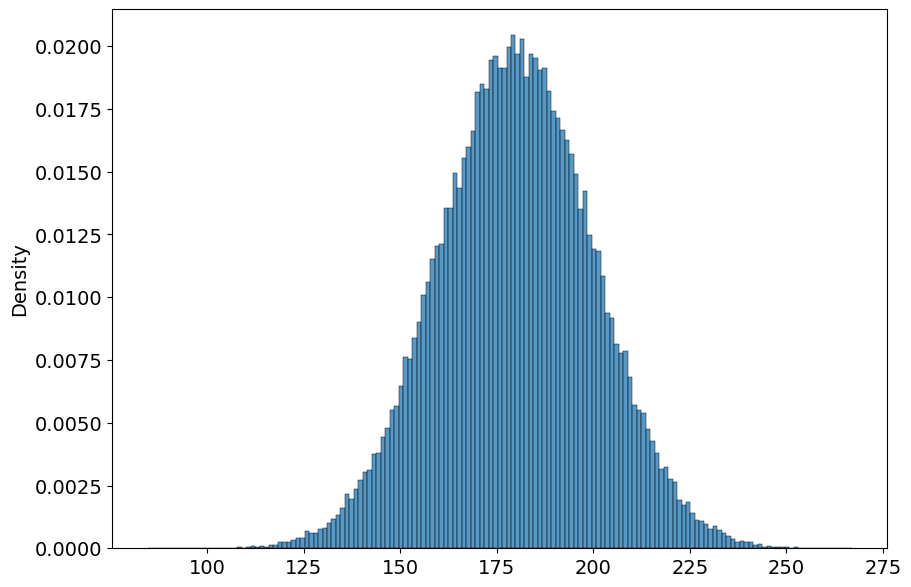

In [8]:
sns.histplot(population, stat="density");

## Get the sample

In [4]:
sample_size = 10
sample = np.random.choice(population,
                          size=sample_size,
                          replace=False)

print(f"mean: {sample.mean():.3f}\tstd: {sample.std():.3f}")

mean: 182.493	std: 23.440


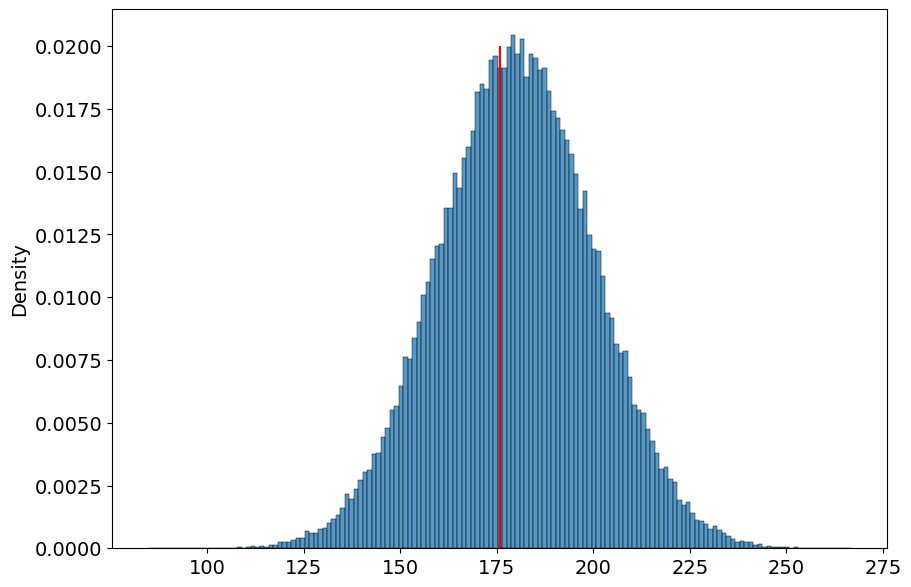

In [12]:
sns.histplot(population, stat="density")
plt.vlines(sample.mean(), ymin=0., ymax=0.02, color="red");

In [13]:
z_stat = (sample.mean() - mu) / (sigma / np.sqrt(sample_size))
z_stat

-0.6756766563400131

In [5]:
from scipy.stats import norm

In [16]:
# Если z_stat > 0, то
# p_value = 1 - norm.cdf(z_stat)
p_value = norm.cdf(z_stat)

p_value

0.2496229800549531

## Why is z-test bad?

Actually we don't know σ

In [6]:
def calculate_p_value_z_test(sample,
                             mu,
                             sigma=None):
    if sigma is None:
        sigma = sample.std()

    sample_size = len(sample)
    z_stat = (sample.mean() - mu) / (sigma / np.sqrt(sample_size))

    p_value = 1 - norm.cdf(z_stat)

    return p_value

In [7]:
# Знаем sigma
n_samples = 10000
p_values = []

for _ in range(n_samples):
    sample = np.random.choice(population,
                              size=sample_size,
                              replace=False)

    p_value = calculate_p_value_z_test(sample,
                                       mu,
                                       sigma)
    p_values.append(p_value)

p_values = np.array(p_values)

In [8]:
(p_values < 0.05).mean()

0.0515

In [9]:
# Не знаем sigma
n_samples = 10000
p_values = []

for _ in range(n_samples):
    sample = np.random.choice(population,
                              size=sample_size,
                              replace=False)

    p_value = calculate_p_value_z_test(sample,
                                       mu)
    p_values.append(p_value)

p_values = np.array(p_values)

In [10]:
(p_values < 0.05).mean()

0.0754

In [12]:
from statsmodels.stats.weightstats import ztest

In [21]:
ztest(sample, value=mu, alternative="two-sided")

(-1.7571616694730243, 0.07889025662362505)

In [15]:
sample.mean()

169.88970310193574

## Statistical power

In [23]:
from tqdm import tqdm

In [43]:
effect_size = 0.1
population_effected = population + effect_size

n_experiments = 1000
sample_size = 100000
p_values = []

for _ in tqdm(range(n_experiments)):
    sample_1 = np.random.choice(population,
                                size=sample_size,
                                replace=False)

    sample_2 = np.random.choice(population_effected,
                                size=sample_size,
                                replace=False)

    _, p_value = ztest(sample_1, sample_2)
    p_values.append(p_value)

p_values = np.array(p_values)

100%|██████████| 1000/1000 [01:17<00:00, 12.93it/s]


In [44]:
(p_values < 0.05).mean()

0.189

# t-test

In [45]:
path_to_data = "drive/MyDrive/teaching/blastim-ml/statistics-day-9/WorldHappiness_Corruption_2015_2020.csv"
data = pd.read_csv(path_to_data)
data.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [46]:
data.shape

(792, 13)

In [47]:
from scipy.stats import ttest_ind

In [51]:
ttest_ind(data.query("Country == 'Norway'")["happiness_score"],
          data.query("Country == 'Bangladesh'")["happiness_score"])

TtestResult(statistic=50.33951864597668, pvalue=2.3129713205961413e-13, df=10.0)

In [52]:
data.query("Country == 'Norway'")["happiness_score"]

0      7.537
135    7.522
266    7.554
397    7.594
531    7.498
664    7.488
Name: happiness_score, dtype: float64

In [53]:
data.query("Country == 'Bangladesh'")["happiness_score"]

97     4.6080
223    4.6940
371    4.4560
495    4.5000
621    4.6430
755    4.8328
Name: happiness_score, dtype: float64